In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [4]:
# Step 1: Read the CSV files into pandas dataframes
df1 =pd.read_excel('C:/Users/Adebolu/Desktop/excel 1.xlsx')
df2 =pd.read_excel('C:/Users/Adebolu/Desktop/excel 2.xlsx')


In [5]:
# Step 2: Merge the two dataframes using "order_id" as the key
merged_df = pd.merge(df1, df2, on='order_id')

NameError: name 'plt' is not defined

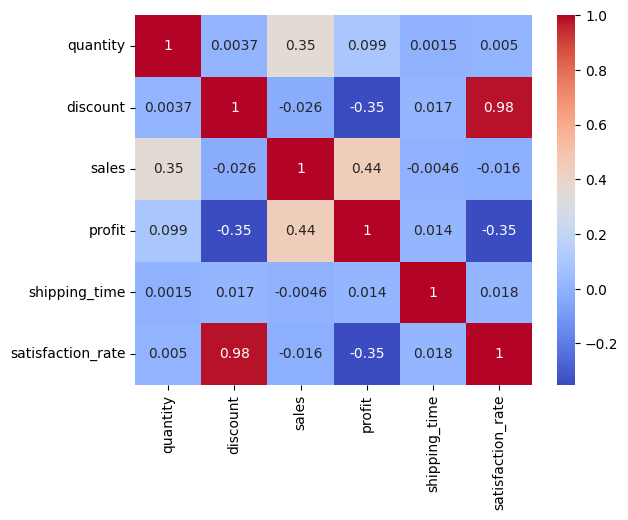

In [36]:
# Correlation matrix
corr_matrix = merged_df[['quantity', 'discount', 'sales', 'profit', 'shipping_time', 'satisfaction_rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Step 4: Perform linear regression
# Define independent and dependent variables
X = merged_df[['shipping_time', 'discount', 'sales', 'profit', 'quantity']]
y = merged_df['satisfaction_rate']

numeric_transformer = StandardScaler()

In [42]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


#Scale numerical features
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant term to the features for statsmodels
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit the model
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      satisfaction_rate   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 3.730e+04
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:32:41   Log-Likelihood:                -2228.1
No. Observations:                6437   AIC:                             4468.
Df Residuals:                    6431   BIC:                             4509.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1314      0.004    265.263      0.0

In [55]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add constant to the features
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit the model
model = sm.OLS(y_train, X_train_scaled).fit()

# Create a DataFrame with coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': ['Intercept'] + X.columns.tolist(), 'Coefficient': model.params})

# Print the summary
print(coefficients_df)

             Feature  Coefficient
const      Intercept     1.131428
x1     shipping_time    -0.000415
x2          discount     1.832192
x3             sales     0.032260
x4            profit    -0.028658
x5          quantity    -0.001848


In [46]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['quantity', 'shipping_time',
                                                   'discount'])])),
                ('linearregression', LinearRegression())])

In [47]:

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Test R^2 score:", test_score)

Training R^2 score: 0.9664000062734681
Test R^2 score: 0.9703306307105776


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import numpy as np


# Select features for clustering
features = ["sales", "quantity", "satisfaction_rate", "ship_mode"]
X = merged_df[features]

# Separate numerical and categorical features
numerical_features = ["sales", "quantity", "satisfaction_rate"]
categorical_feature = ["ship_mode"]

# Standardize numerical features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_features])

# One-hot encode categorical feature
encoder = OneHotEncoder(sparse=False)
X_categorical = encoder.fit_transform(X[categorical_feature])

# Combine scaled numerical and encoded categorical features
X = np.concatenate([X_numerical, X_categorical], axis=1)




c:\Users\Adebolu\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of k values to explore
k_range = range(2, 11)  # Experiment with different ranges as needed

# Create a list to store silhouette scores for each k
silhouette_scores = []

for k in k_range:
  # Perform KMeans clustering for the current k
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X)

  # Calculate silhouette score for the current k
  silhouette_score_k = silhouette_score(X, kmeans.labels_)
  silhouette_scores.append(silhouette_score_k)

# Find the k with the highest silhouette score (indicating better separation)
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]

c:\Users\Adebolu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Adebolu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Adebolu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Adebolu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

In [12]:
best_k

3

c:\Users\Adebolu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


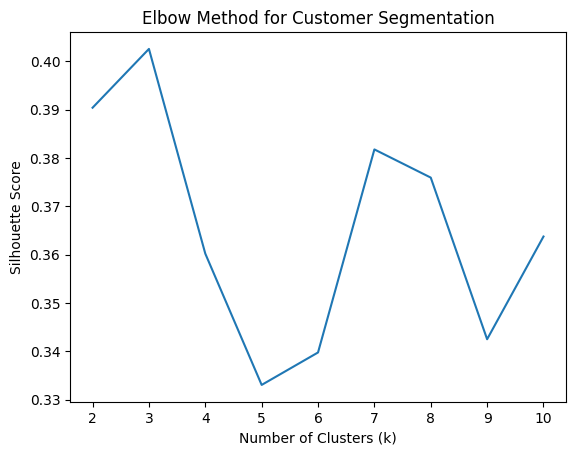

In [14]:
# Perform KMeans clustering with the best k
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(X)

# Add cluster labels to the dataframe
merged_df["cluster"] = kmeans.labels_

# ... (code for analysis and visualization remains the same)

# Plot the elbow curve (optional)
import matplotlib.pyplot as plt

plt.plot(k_range, silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Elbow Method for Customer Segmentation")
plt.show()

In [15]:
merged_df.head(10)


,order_id,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,state,shipping_time,product_name,discount,sales,profit,quantity,category,sub_category,satisfaction_rate,cluster
0,0,2011-07-31,104,505,5,0,0,2011-08-03,1,93,3,532,0.0,85,15,2,0,9,0,2
1,0,2011-07-31,104,505,5,0,0,2011-08-03,1,93,3,1237,0.0,26,7,2,1,10,0,2
2,1,2011-04-11,147,576,4,0,0,2011-04-16,0,87,5,238,0.0,294,109,7,2,0,0,1
3,2,2011-09-15,205,453,5,0,2,2011-09-19,0,9,4,1756,0.0,76,11,3,0,9,0,2
4,2,2011-09-15,205,453,5,0,2,2011-09-19,0,9,4,168,0.0,252,15,5,1,3,0,2
5,2,2011-09-15,205,453,5,0,2,2011-09-19,0,9,4,1679,0.0,90,17,3,1,15,0,2
6,3,2011-10-18,41,402,5,0,0,2011-10-22,1,54,4,1209,0.0,1334,200,8,2,13,0,1
7,4,2011-06-09,530,625,5,0,1,2011-06-11,1,14,2,192,0.0,32,6,3,1,10,0,2
8,5,2011-09-10,119,662,5,0,0,2011-09-12,1,56,2,529,0.0,88,3,2,0,9,0,2
9,5,2011-09-10,119,662,5,0,0,2011-09-12,1,56,2,300,0.0,284,43,5,1,2,0,2


In [18]:
cluster_means = cluster_groups[['sales', 'quantity', 'satisfaction_rate']].mean()
print(cluster_means)


              sales  quantity  satisfaction_rate
cluster                                         
0        166.440326  3.525574           4.933284
1        852.468645  6.962239           0.610249
2        164.859636  2.928667           0.294919
